# Degree and transitivity of a network

  Jefter Santiago Mares

  jefter@usp.br

  n°USP 12559016.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# General setup
Importing libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1 - Les Miserables network

In [3]:
g = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Complex Networks/data/lesmis.gml")

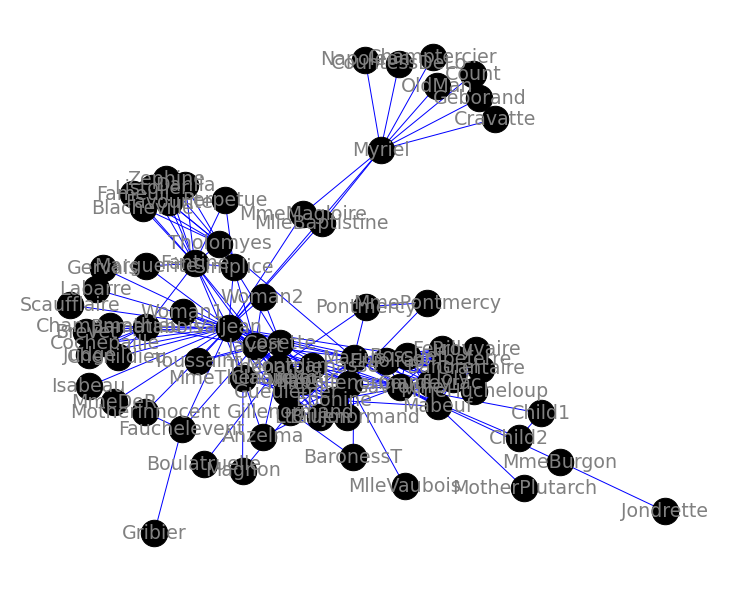

In [4]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="black",font_color="grey",edge_color="blue", font_size=19, node_size=700, with_labels = True)

In [5]:
g.remove_edges_from(nx.selfloop_edges(g))

## Connectivity
To calculate the moment of distributions from the degree of the vertices in a graph we can use the relation: 
$$ \langle x^m \rangle = \sum_{x = 0}^{\infty} X^m P(X = x)$$

We'll do this for the "Les Miserables" network.

First of all convert all the vertice labels to integer starting at 0.

In [6]:
g = nx.convert_node_labels_to_integers(g, first_label=0)

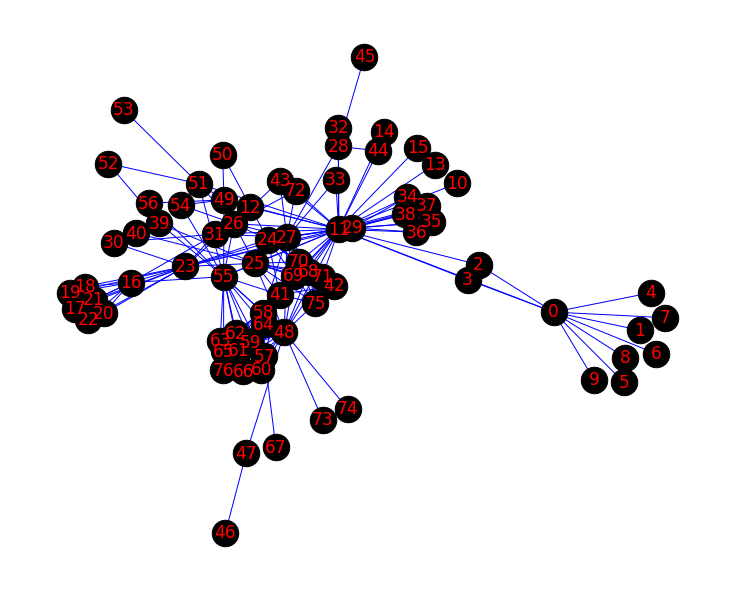

In [7]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="black",font_color="red",edge_color="b", font_size=17, node_size=700, with_labels = True)

In [29]:
vd = np.array(list(dict(g.degree()).values()))
print("Mean degree: <k> = ", np.mean(vd))
print("Median: Md(k) = ", np.median(vd))

Mean degree: <k> =  21.874205844980942
Median: Md(k) =  5.0


By the visualization of the network it was expected that the $Md(k) > \langle k \rangle $. In the book some characters are more "connected" that others. 

If $Md(k) \sim \langle k \rangle $ the more homogeneous is the network.

Now for calculate the moment of distribution from the degree.


In [9]:
# M -> is the <x^M> number of the moment.
def moment(g, M):
  m = 0
  n = len(g)
  for i in g.nodes():
    m = m + g.degree(i)**M
  return m/n

In [10]:
print("3° Moment of distribution: ", moment(g, 3))
print("4° Moment of distribution: ", moment(g, 4))

3° Moment of distribution:  1408.025974025974
4° Moment of distribution:  33592.72727272727


# Task 2 - Powergrid complexity

In [11]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/data/powergrid.txt", nodetype=int)
g.remove_edges_from(nx.selfloop_edges(g))

In [12]:
print("Number of nodes = ", len(g))
print("Number of edges = ", g.number_of_edges())

Number of nodes =  4941
Number of edges =  6594


The complexity coefficient is $ \alpha = \frac{\langle k^2 \rangle}{\langle k \rangle}$ and the bigger the $\alpha$, the more complex is the network.

In [33]:
def complexity(g):
  vd = np.array(list(dict(g.degree()).values()))

  k2 = (1/len(vd)) * sum(vd**2)
  kmean = np.mean(vd)

#  print("<k> = ", kmean)
#  print("<k²> = ", k2)
  print("<k²>/<k> = ", k2/kmean)

In [31]:
complexity(g)

<k> =  21.874205844980942
<k²> =  2454.7725540025413
<k²>/<k> =  112.22224803950043


The variance being much bigger than the mean degree suggest that the network is very heterogeneous. The coefficient of dispersion (or complexity) shows that this network is highly heterogeneous and this suggest the possibility of it being a scale-free network.

The figure above is a draw of the network. I also tried to draw it highlighting the `hubs` present in the graph.

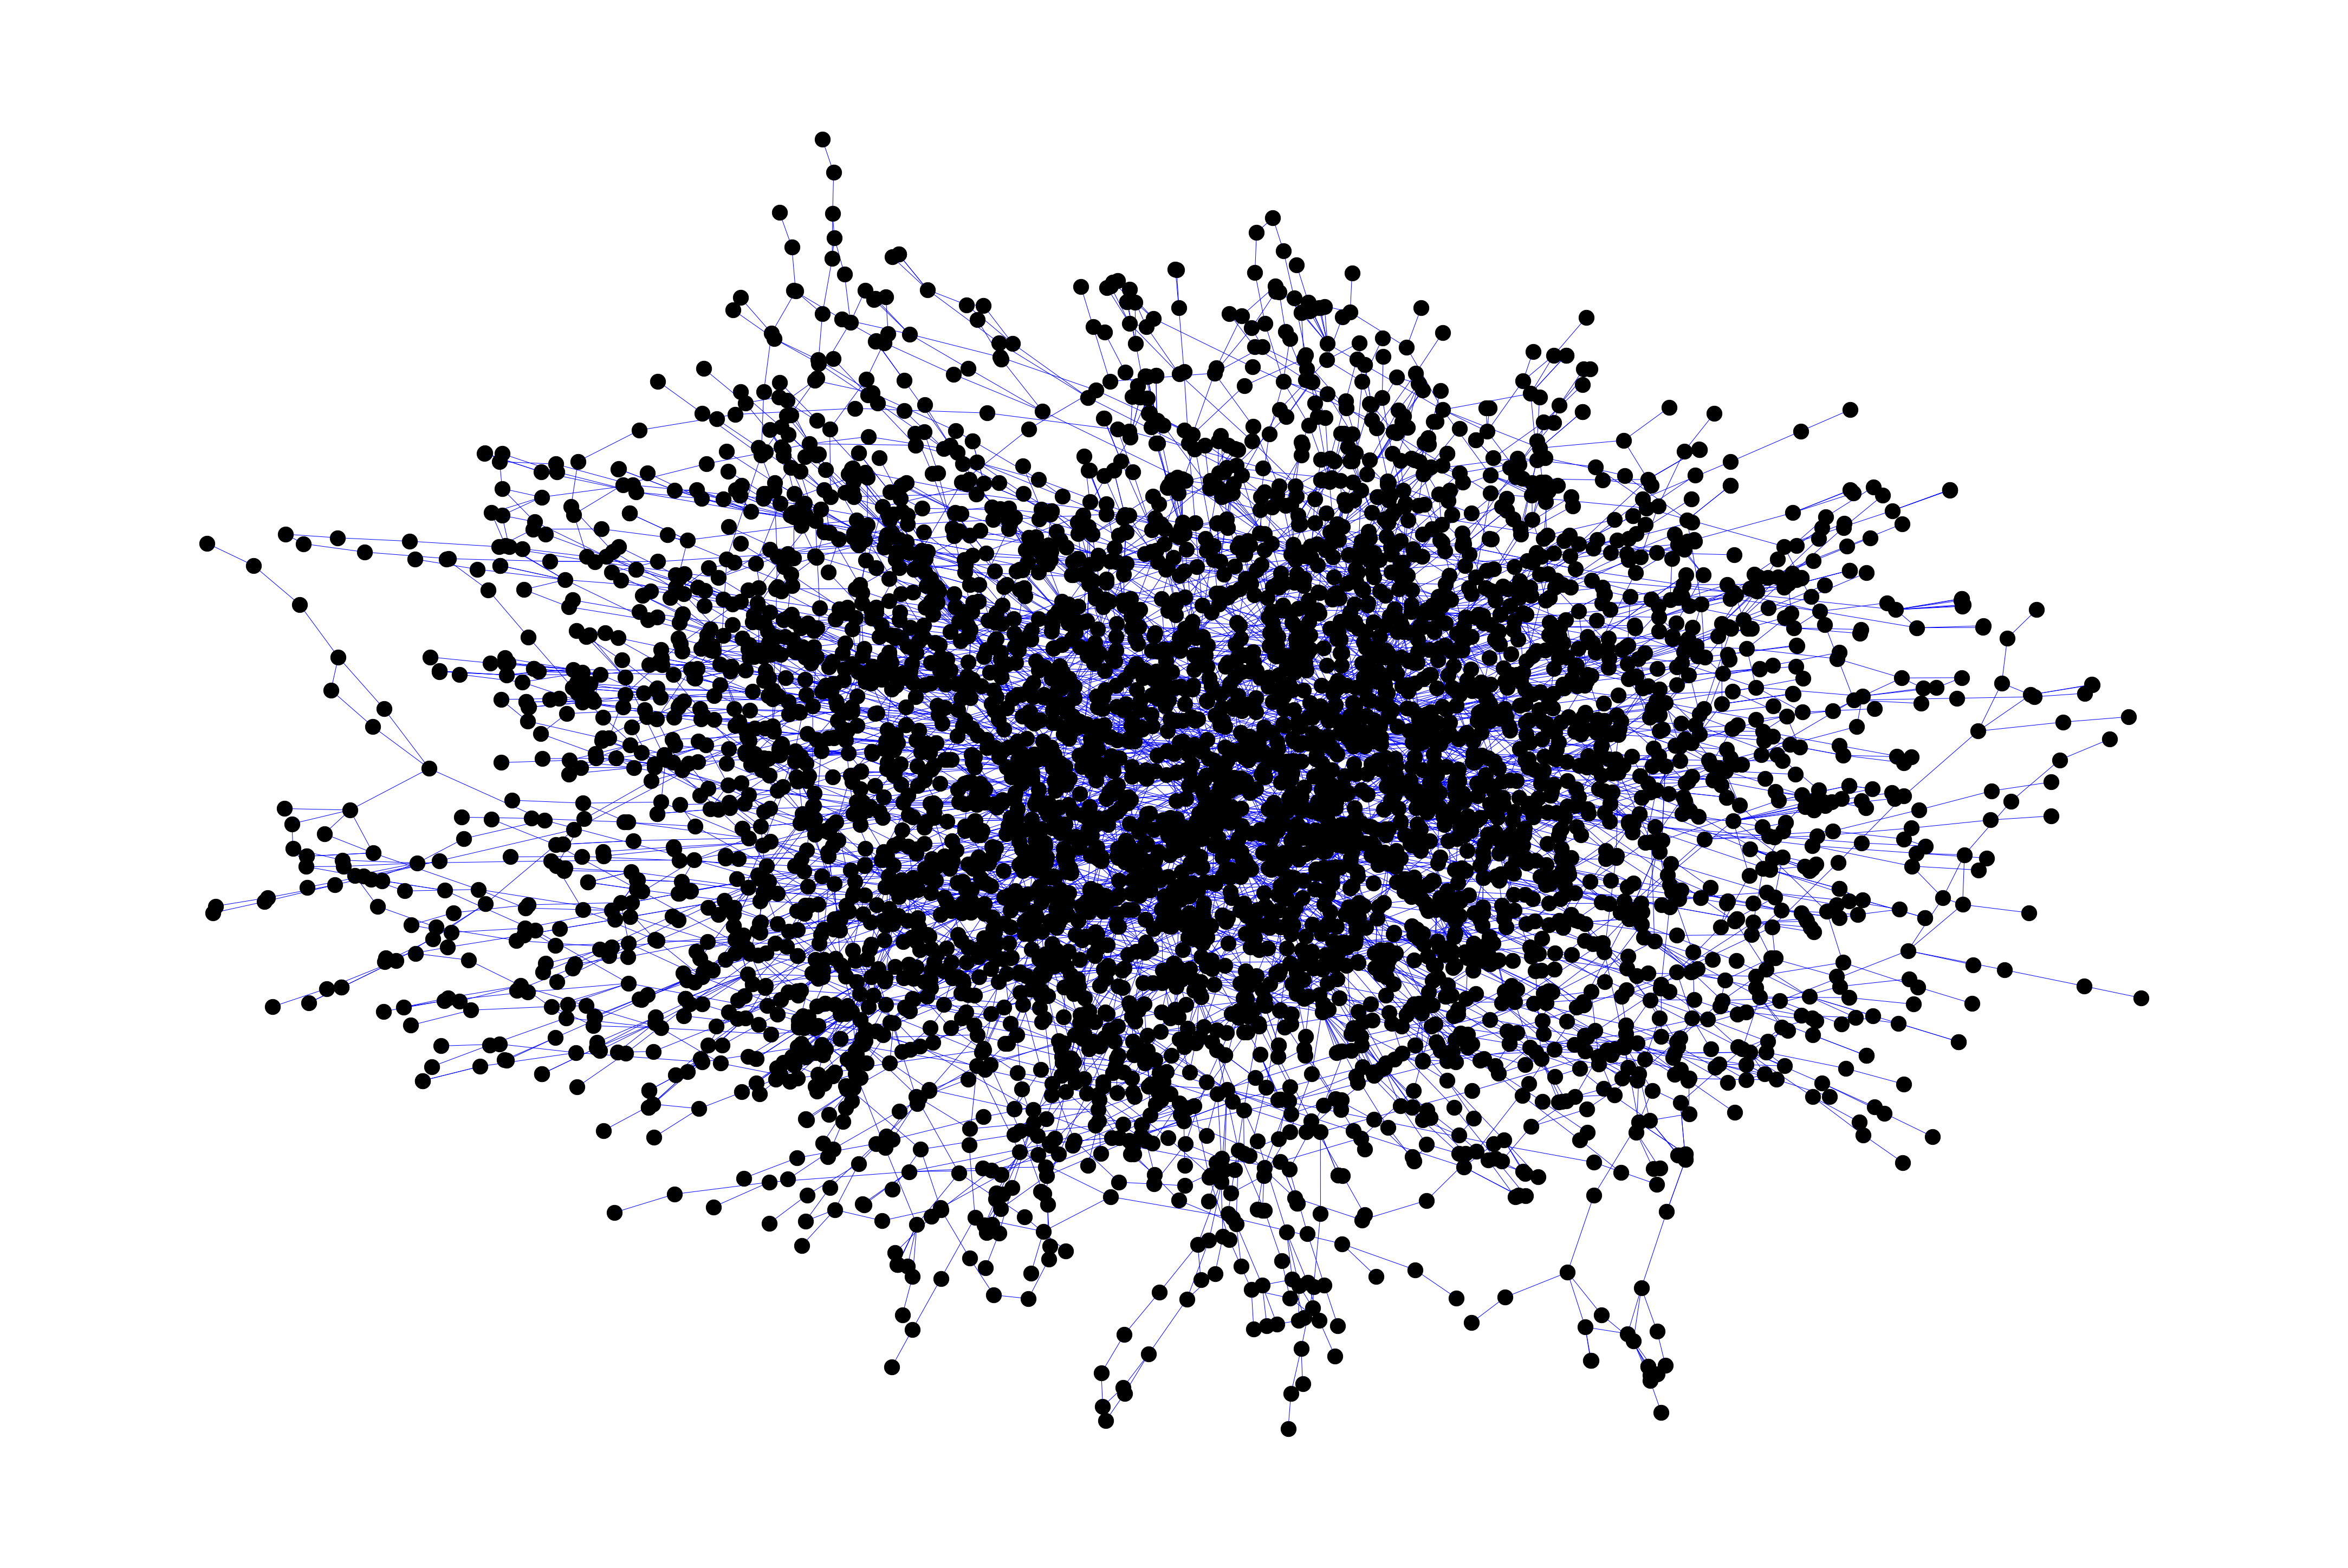

In [15]:
plt.figure(figsize=(60, 40))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="black",font_color="red",edge_color="blue", font_size=22, node_size=800, with_labels = False)

In [16]:
v = np.zeros(len(g.nodes()))
k = 0
for i in g.nodes():
  v[k] = len(list(g.neighbors(i)))
  k += 1

print("Maximum connections of a node in the network = ", max(v))

# The nodes with more than 10 connections will be highlighted.

indices = np.where(v > 10)
# print(indices)
subset = list(indices)

print(list(subset))

Maximum connections of a node in the network =  19.0
[array([ 197,  529,  657,  658,  660,  786, 1206, 1436, 1446, 2427, 2699,
       2705, 2740, 2746, 2790, 2871, 3136, 3571, 4045, 4516, 4522, 4524,
       4525, 4546, 4555, 4557])]


# Task 3 - Shannon Entropy for the `euroroad` database

In [17]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/data/euroroad.txt", nodetype=int)
# g.remove_edges_from(nx.selfloop_edges(g))

In [19]:
# Calculates Shanon Entropy. 
def H(g):
  v = np.array(list(dict(g.degree()).values()))

  max = np.max(v)
  min = np.min(v)

  # Creating distribution.
  vals = np.arange(0, max+1)
  p = np.zeros(max + 1)
  for i in v:
    p[i] = p[i] + 1
  p = p/sum(p)


  # Entropy Calculation: H(X) = - sum(p(x) logp(x))
  H = 0
  for pi in p:
    if(pi > 0):
      H = H - pi*np.log2(pi)
  
  return H

print("Shannon Entropy = ", "%3.4f"%H(g))

Shannon Entropy =  2.0033


# Task 4 - Transivity and clustering coefficient of the `usairport`database


In [20]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/data/usairport.txt", nodetype=int, data=(('weight',float),))

g.remove_edges_from(nx.selfloop_edges(g))

In [22]:
print("Transitivity = ", nx.transitivity(g))
print("Average clustering coefficient = ", nx.average_clustering(g))

Transitivity =  0.38414344664491556
Average clustering coefficient =  0.5041525392095769


# Task 5 - Complexity and Shannon Entropy measures for the `usairport` network

In [35]:
complexity(g)
print("Shannon Entropy = ", H(g))

<k²>/<k> =  112.22224803950043
Shannon Entropy =  4.985977646539227
